In [2]:
import torch.optim as optim
import torch.cuda as cuda
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import cv2
from torch import cat
from UNET import UNET
from torch.utils.data import random_split
from Dataset import FramesDataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [3]:
device = "cuda" if cuda.is_available() else "cpu"
unet = UNET(in_channels=6, out_channels=3).to(device)
optimizer = optim.Adam(unet.parameters(), lr= 0.001)
dataset = FramesDataset(dir = r'C:\Users\Mau\Desktop\proyectos\Proyecto\dataset', transform=transforms.ToTensor())
len = dataset.__len__()
test = len//10
train = len - test

In [8]:
len = dataset.__len__()
test = len//10
train = len - test 

In [9]:
trainset, testset = random_split(dataset,[train,test])
trainset = DataLoader(trainset, batch_size=5, shuffle=True)
testset = DataLoader(testset, batch_size=5, shuffle=False)

In [10]:
epochs = 1
loss = None
for epoch in range(epochs):
    for data in trainset:
        print(loss)
        (F1,F3) ,F2 = data
        input = cat((F1,F3),1)
        output = unet(input)
        optimizer.zero_grad()
        loss = F.mse_loss(output , F2)
        loss.backward()
        optimizer.step()
    print(loss)

None
tensor(0.5786, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.5228, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.3554, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.2580, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.1867, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.1221, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0906, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0625, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0449, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0249, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0155, device='cuda:0', gra

In [17]:
data = dataset.__getitem__(100)
img1 = data[0][0]
img3 = data[0][1]
img2 = data[1]
tensor = torch.unsqueeze(cat((img1,img3),0),0).cuda()
print(tensor.shape)
generated = unet(tensor)[0]

torch.Size([1, 6, 300, 400])


In [18]:
img1 = img1.cpu().permute(1, 2, 0).numpy()
img2 = img2.cpu().permute(1, 2, 0).numpy()
img3 = img3.cpu().permute(1, 2, 0).numpy()
generated = generated.cpu().permute(1, 2, 0).detach().numpy()
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
generated = cv2.cvtColor(generated, cv2.COLOR_BGR2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Third')

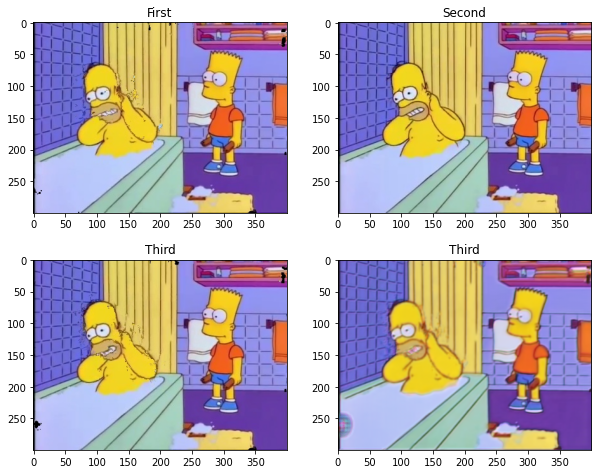

In [19]:
fig = plt.figure(figsize=(10, 8))

fig.add_subplot(2, 2, 1)
plt.imshow(img1)
plt.title("First")
  
fig.add_subplot(2, 2, 2)
plt.imshow(img2)
plt.title("Second")
  
fig.add_subplot(2, 2, 3)
plt.imshow(img3)
plt.title("Third")

fig.add_subplot(2, 2, 4)
plt.imshow(generated)
plt.title("Third")

In [20]:
torch.save(unet.state_dict(), 'weights.pth')